# Guassian kernels

In [89]:
import numpy as np
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

In [90]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
guassian_kernal(x1, x2, 2)

1.5426225510834945e-05

In [91]:
mat = sio.loadmat('./data/ex6data2.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')
data.sample(3)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
576,0.180876,0.693713,1
405,0.565668,0.648392,0
232,0.307604,0.730263,0


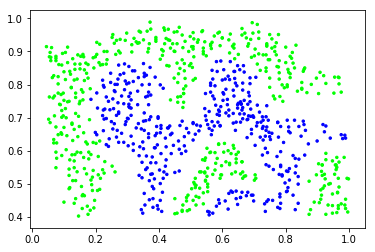

In [92]:
plt.scatter(data.X1, data.X2, s=6, c=data.y, cmap='brg')

## Try built-in Gaussian kernel of sklearn

In [93]:
svc = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

In [95]:
predict_prob = svc.predict_proba(data[['X1', 'X2']])[:, 0]
predict_prob.shape

(863,)

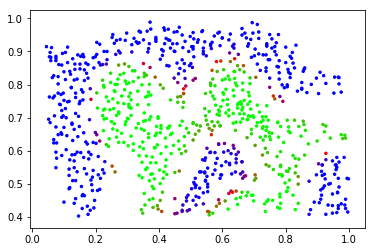

In [96]:
plt.scatter(data.X1, data.X2, s=6, c=predict_prob, cmap='brg')